In [52]:
#importing the required packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.metrics import roc_auc_score
import warnings
# from sklearn.metrics import mean_squared_error,roc_auc_score,precision_score
warnings.filterwarnings('ignore')
%matplotlib inline

In [53]:
#reading the kidneyChronic.csv and storing it in df.
df = pd.read_csv('kidneyChronic.csv')
#displaying the 1st N rows using head function.
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.02,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.01,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [54]:
#replacing '?' with 'NaN'
df = df.replace('?',np.nan)
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,NaN,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.02,4,0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.01,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [55]:
#displaying the list of columns with its datatypes
df.dtypes

age      object
bp       object
sg       object
al       object
su       object
rbc      object
pc       object
pcc      object
ba       object
bgr      object
bu       object
sc       object
sod      object
pot      object
hemo     object
pcv      object
wbcc     object
rbcc     object
htn      object
dm       object
cad      object
appet    object
pe       object
ane      object
class    object
dtype: object

In [56]:
#Data cleaning 
#to_replace pattern we are trying to replace with the dataset
df[['htn','dm','cad','pe','ane']] = df[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
df[['rbc','pc']] = df[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
df[['pcc','ba']] = df[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
df[['appet']] = df[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
df['dm'] = df['dm'].replace(to_replace={'\tyes':1,'\tno':0})
df['dm'] = df['dm'].replace(to_replace={' yes':1})
df['cad'] = df['cad'].replace(to_replace={'\tno':0})
df['class'] = df['class'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})


In [57]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,NaN,0.0,0.0,0.0,121,...,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7,50,1.02,4,0,NaN,0.0,0.0,0.0,NaN,...,38,6000,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62,80,1.01,2,3,0.0,0.0,0.0,0.0,423,...,31,7500,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48,70,1.005,4,0,0.0,1.0,1.0,0.0,117,...,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51,80,1.01,2,0,0.0,0.0,0.0,0.0,106,...,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [58]:
#displaying data types after data cleaning
df.dtypes

age       object
bp        object
sg        object
al        object
su        object
rbc      float64
pc       float64
pcc      float64
ba       float64
bgr       object
bu        object
sc        object
sod       object
pot       object
hemo      object
pcv       object
wbcc      object
rbcc      object
htn      float64
dm       float64
cad      float64
appet    float64
pe       float64
ane      float64
class    float64
dtype: object

In [59]:
#replacing the \t?, \t43 values with nan and 43 respectively
df.pcv = df.pcv.replace('\t?',np.nan)
df.pcv = df.pcv.replace('\t43','43')
values_pcv=df.pcv.values
#print(values_pcv)

In [60]:
#replacing the \t?, \t6200, \t8400 with nan,6200,8400 respectively
values_wbcc=df.wbcc.values
df.wbcc = df.wbcc.replace('\t?',np.nan)
df.wbcc = df.wbcc.replace('\t6200','6200')
df.wbcc = df.wbcc.replace('\t8400','8400')
#print(values_wbcc)

In [61]:
#replacing the values of \t? with nan
values_rbcc=df.rbcc.values
df.rbcc = df.rbcc.replace('\t?',np.nan)
#print(values_rbcc)

In [62]:
#importing the csv 
df.to_csv("df_test.csv", index=False)

In [63]:
#converting the object datatype to float and for class feature to int type
df = df.astype('float')
df['class'] = df['class']. astype('int')
df.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc      float64
pc       float64
pcc      float64
ba       float64
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn      float64
dm       float64
cad      float64
appet    float64
pe       float64
ane      float64
class      int32
dtype: object

In [64]:
#finfing the count of unique values for each feature.
for i in df.columns:
    print(f'{i} : {df[i].nunique()} values')

age : 76 values
bp : 10 values
sg : 5 values
al : 6 values
su : 6 values
rbc : 2 values
pc : 2 values
pcc : 2 values
ba : 2 values
bgr : 146 values
bu : 118 values
sc : 84 values
sod : 34 values
pot : 40 values
hemo : 115 values
pcv : 42 values
wbcc : 89 values
rbcc : 45 values
htn : 2 values
dm : 2 values
cad : 2 values
appet : 2 values
pe : 2 values
ane : 2 values
class : 2 values


In [65]:
#differentiating and storing numnerical and categorical features in list.
numerical_features = []
categorical_features = []

#iterating through the columns
#checking if unique count of feature is greater than 7 then considering it as numerical feature or categorical feature
#considering nan aswell
for i in df.columns:
    if df[i].nunique()>7:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

In [66]:
#printing both numerical and categorical features
print('Numerical features: ', numerical_features)
print('\nCategorical features: ', categorical_features)

Numerical features:  ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']

Categorical features:  ['sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class']


In [67]:
#getting the unique values for each categorical feature
for unique_values in categorical_features:
    print(f'{unique_values} has {df[unique_values].unique()} categories.\n')

sg has [1.02  1.01  1.005 1.015   nan 1.025] categories.

al has [ 1.  4.  2.  3.  0. nan  5.] categories.

su has [ 0.  3.  4.  1. nan  2.  5.] categories.

rbc has [nan  0.  1.] categories.

pc has [ 0.  1. nan] categories.

pcc has [ 0.  1. nan] categories.

ba has [ 0.  1. nan] categories.

htn has [ 1.  0. nan] categories.

dm has [ 1.  0. nan] categories.

cad has [ 0.  1. nan] categories.

appet has [ 1.  0. nan] categories.

pe has [ 0.  1. nan] categories.

ane has [ 0.  1. nan] categories.

class has [1 0] categories.



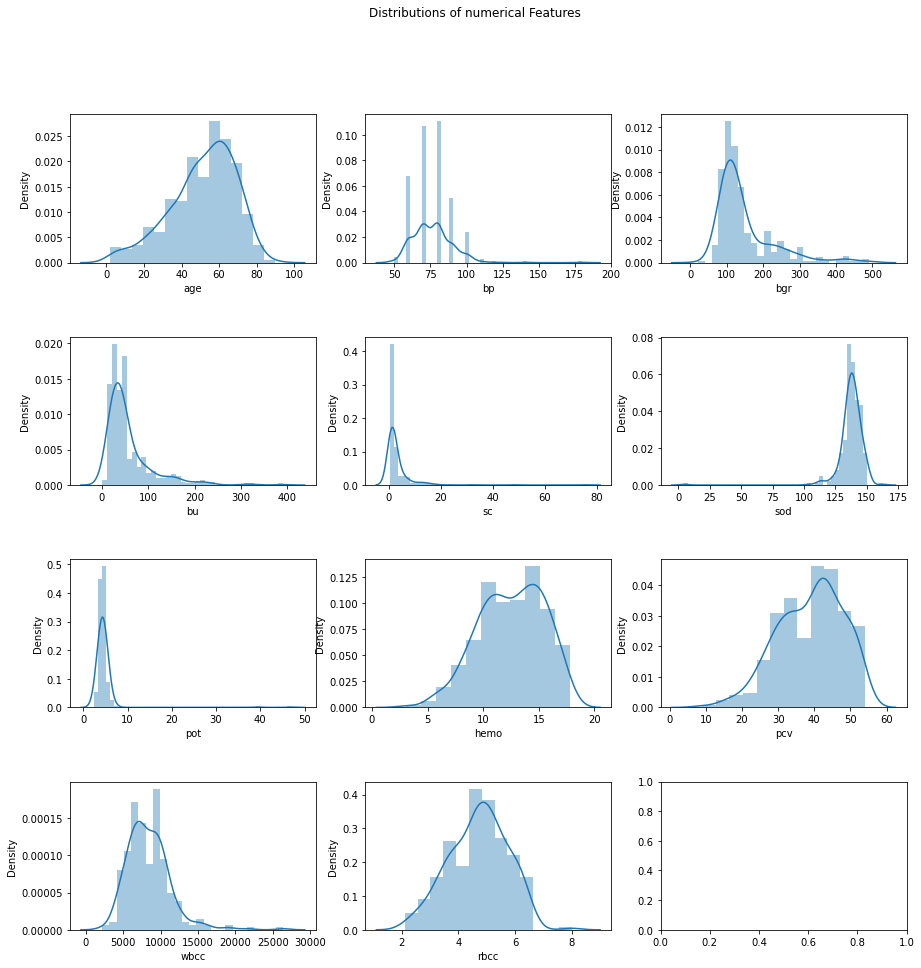

In [68]:
#plotting the distribution plot for all numerical features.
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15,15))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of numerical Features')

for ax, unique_values in zip(axes.flatten(), numerical_features):
    sns.distplot(a=df[unique_values], ax=ax)

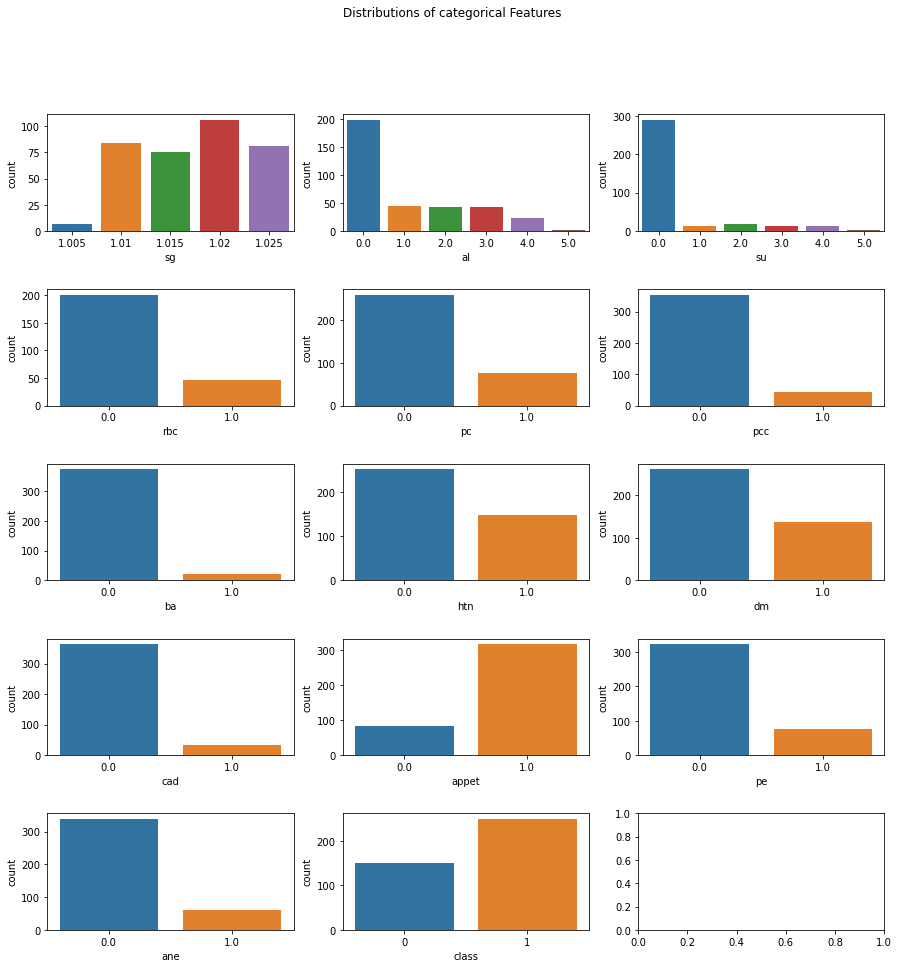

In [69]:
#plotting the count plot for all categorical features.
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15,15))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of categorical Features')


for ax, unique_values in zip(axes.flatten(), categorical_features):
    sns.countplot(df[unique_values], ax=ax)

In [70]:
#finding the mean/mode of all features and filling the values nan with mean/mode : Imputation using mean/mode

#imputation using mean for numerical features

df.age.fillna(value=df.age.mean(),inplace=True)
df.bp.fillna(value=df.bp.mean(),inplace=True)
df.bgr.fillna(value=df.bgr.mean(),inplace=True)
df.bu.fillna(value=df.bu.mean(),inplace=True)
df.sc.fillna(value=df.sc.mean(),inplace=True)
df.sod.fillna(value=df.sod.mean(),inplace=True)
df.pot.fillna(value=df.pot.mean(),inplace=True)
df.hemo.fillna(value=df.hemo.mean(),inplace=True)
df.pcv.fillna(value=df.pcv.mean(),inplace=True)
df.wbcc.fillna(value=df.wbcc.mean(),inplace=True)
df.rbcc.fillna(value=df.rbcc.mean(),inplace=True)


In [73]:
#imputation using mode for categorical features

df.sg.fillna(df.sg.mode()[0],inplace=True)
df.al.fillna(df.al.mode()[0],inplace=True)
df.su.fillna(df.su.mode()[0],inplace=True)
df.rbc.fillna(df.rbc.mode()[0],inplace=True)
df.pc.fillna(df.pc.mode()[0],inplace=True)
df.pcc.fillna(df.pcc.mode()[0],inplace=True)
df.ba.fillna(df.ba.mode()[0],inplace=True)
df.htn.fillna(df.htn.mode()[0],inplace=True)
df.dm.fillna(df.dm.mode()[0],inplace=True)
df.cad.fillna(df.cad.mode()[0],inplace=True)
df.appet.fillna(df.appet.mode()[0],inplace=True)
df.pe.fillna(df.pe.mode()[0],inplace=True)
df.ane.fillna(df.ane.mode()[0],inplace=True)


In [75]:
#checking the values after imputation
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,0.0,0.0,121.000000,...,44.0,7800.0,5.200000,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,0.0,0.0,148.036517,...,38.0,6000.0,4.707435,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.000000,...,31.0,7500.0,4.707435,0.0,1.0,0.0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.000000,...,32.0,6700.0,3.900000,1.0,0.0,0.0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.000000,...,35.0,7300.0,4.600000,0.0,0.0,0.0,1.0,0.0,0.0,1


In [76]:
#checking the file after replacing NaN with mean value. record count : 400
df.to_csv("df_test.csv", index=False)

In [77]:
#dropping the duplicate records
df = df.drop_duplicates()
#taking the count of values of class feature : whether it is ckd or not
df['class'].value_counts()

1    250
0    150
Name: class, dtype: int64

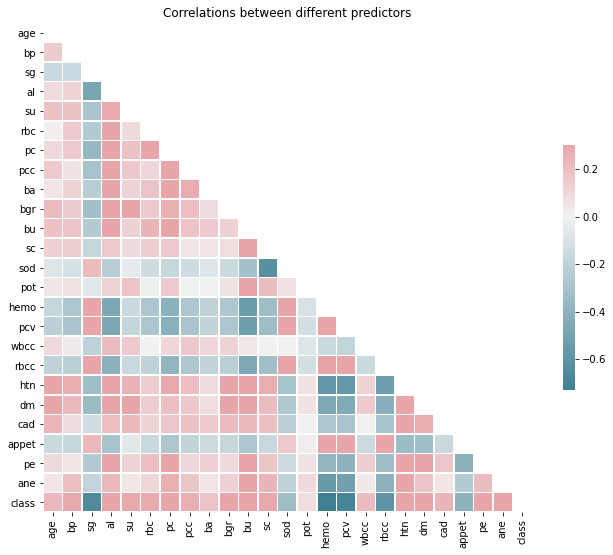

In [78]:
#plotting correlation. 
corr_df = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_df, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlations between different predictors')
plt.show()

In [47]:
#displaying the pairwise correlation of all columns in the dataframe. 
corr_df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
age,1.000000,0.148004,-0.159073,0.084416,0.187615,0.011783,0.101951,0.159074,0.043573,0.214410,...,-0.211805,0.100061,-0.201051,0.393440,0.363475,0.232951,-0.157741,0.094434,0.050567,0.225405
bp,0.148004,1.000000,-0.164422,0.122541,0.190218,0.151369,0.156856,0.059560,0.112173,0.149100,...,-0.292714,0.026067,-0.220822,0.270447,0.228250,0.086618,-0.177601,0.054083,0.194962,0.290600
sg,-0.159073,-0.164422,1.000000,-0.479962,-0.292053,-0.253894,-0.365353,-0.306426,-0.231704,-0.317893,...,0.501064,-0.206884,0.443741,-0.323643,-0.351016,-0.135814,0.230975,-0.253803,-0.184155,-0.659504
al,0.084416,0.122541,-0.479962,1.000000,0.287751,0.394844,0.561713,0.417868,0.377935,0.310481,...,-0.475165,0.207303,-0.411122,0.406057,0.308101,0.200957,-0.303145,0.411080,0.229556,0.531562
su,0.187615,0.190218,-0.292053,0.287751,1.000000,0.092940,0.190062,0.168091,0.119399,0.629809,...,-0.181518,0.159034,-0.163871,0.254268,0.430514,0.229301,-0.069216,0.116442,0.042464,0.294555
rbc,0.011783,0.151369,-0.253894,0.394844,0.092940,1.000000,0.377394,0.102948,0.184402,0.153076,...,-0.280958,0.002207,-0.202455,0.140538,0.145646,0.111493,-0.160868,0.199285,0.107625,0.282642
pc,0.101951,0.156856,-0.365353,0.561713,0.190062,0.377394,1.000000,0.520118,0.330401,0.262259,...,-0.418580,0.107886,-0.383240,0.291719,0.201032,0.172295,-0.274985,0.350227,0.260566,0.375154
pcc,0.159074,0.059560,-0.306426,0.417868,0.168091,0.102948,0.520118,1.000000,0.275082,0.197593,...,-0.294242,0.163456,-0.267982,0.195623,0.165236,0.188029,-0.189688,0.104356,0.175861,0.265313
ba,0.043573,0.112173,-0.231704,0.377935,0.119399,0.184402,0.330401,0.275082,1.000000,0.085940,...,-0.189822,0.103546,-0.192222,0.089046,0.080070,0.162395,-0.149126,0.134732,0.052208,0.186871
bgr,0.214410,0.149100,-0.317893,0.310481,0.629809,0.153076,0.262259,0.197593,0.085940,1.000000,...,-0.267580,0.121371,-0.222568,0.369849,0.500618,0.212433,-0.176132,0.101502,0.126854,0.401374


In [48]:
#With sklearn.model_selection.train_test_split you are creating 4 portions of data which will be used for fitting & predicting values.
#X_train, X_test, y_train, y_test

X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,:-1], df['class'], 
                                                    test_size = 0.33, random_state=44,
                                                   stratify= df['class'] )

In [49]:
#using lightgbm
# X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)
#converting the dataset into proper LGB format 
d_train=lightgbm.Dataset(X_train, label=y_train)
#Specifying the parameter
params={}
params['learning_rate']=0.03
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='binary' #Binary target feature
params['metric']='binary_logloss' #metric for binary classification
params['max_depth']=10
#train the model 
clf=lightgbm.train(params,d_train,100) #train the model on 100 epocs
#prediction on the test set
y_pred=clf.predict(X_test)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 168, number of negative: 100
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001040 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 497
[LightGBM] [Info] Number of data points in the train set: 268, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.626866 -> initscore=0.518794
[LightGBM] [Info] Start training from score 0.518794
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

In [50]:
# if>=0.5 ---> 1
# else ---->0
#rounding the values
y_pred=y_pred.round(0)
#converting from float to integer
y_pred=y_pred.astype(int)
#roc_auc_score metric
print ('roc_auc_score : ',roc_auc_score(y_pred,y_test))
confusion = confusion_matrix(y_test, y_pred)
print('confusion matrix : \n',confusion)
#0.9772727

roc_auc_score :  0.9777477255962627
confusion matrix : 
 [[48  2]
 [ 1 81]]


In [51]:
TP= confusion[0][0]
TN= confusion[1][1]
FP= confusion[0][1]
FN= confusion[1][0]

accuracy = (TP+TN)/(TP+TN+FP+FN)

print("Accuracy of the model : ",accuracy)

Accuracy of the model :  0.9772727272727273
